In [ ]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("fraudTest.csv")
print("Shape:", df.shape)
print(df.head())


Shape: (555719, 23)
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(cat_cols)

Categorical Columns:
Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [ ]:
# Data cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_raw = pd.read_csv("fraudTest.csv")
df = df_raw.copy()
target = "is_fraud"

<small> This code creates a raw copy of datadset </small>

In [ ]:
n_rows = len(df)
audit = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "missing_pct": (df.isnull().mean()*100).round(2),
    "n_unique": df.nunique(dropna=True)
})

<small> This code creates a summary showing each column’s data type, missing value percentage, and number of unique values.</small>

In [ ]:
display(audit.head(30))

,dtype,missing_pct,n_unique
Unnamed: 0,int64,0.0,555719
trans_date_trans_time,object,0.0,544760
cc_num,int64,0.0,924
merchant,object,0.0,693
category,object,0.0,14
amt,float64,0.0,37256
first,object,0.0,341
last,object,0.0,471
gender,object,0.0,2
street,object,0.0,924


In [ ]:
print(n_rows)

555719


In [ ]:
# feature engineering
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,day_of_week
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,21,6,6
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,21,6,6
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,21,6,6
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,21,6,6
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,21,6,6


<small>
This code converts the transaction date into datetime format and extracts useful time-based features — hour, day, month, and day of the week
</small>


In [ ]:
df['dob'] = pd.to_datetime(df['dob'])
df.dropna(subset=['dob'], inplace=True) # Drop rows where 'dob' is NaN
df['age'] = ((df['trans_date_trans_time'] - df['dob']).dt.days / 365).astype(int)

<small>
This code converts the date of birth into datetime, removes missing values, and calculates each customer’s age from their transaction date — adding a new feature called ‘age’ for analysis.
</small>


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,day_of_week,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,21,6,6,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,21,6,6,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,21,6,6,49
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,21,6,6,32
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,21,6,6,65


In [ ]:
df.drop(['dob','trans_date_trans_time','unix_time'], axis=1, inplace=True)

In [ ]:
df.isnull().mean()*100

,0
Unnamed: 0,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
first,0.0
last,0.0
gender,0.0
street,0.0
city,0.0


In [ ]:
## Drop irrelevantcolumns
drop_cols = ['Unnamed: 0','cc_num','first','last','street','zip','trans_num']
df.drop(columns=drop_cols, inplace=True)


<small> Dropping the irrelevant columns which is not use for analysis

In [ ]:
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,day_of_week,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,21,6,6,52
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,21,6,6,30
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,12,21,6,6,49
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,12,21,6,6,32
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,12,21,6,6,65


# Data visualization

In [ ]:
df['is_fraud'].value_counts(normalize=True) * 100
#Non fraud percentage: 99.61 and fraud percentage: 0.39 the data is imbalance

,proportion
is_fraud,
0,99.614014
1,0.385986


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Univariate analysis

<Axes: xlabel='is_fraud', ylabel='amt'>

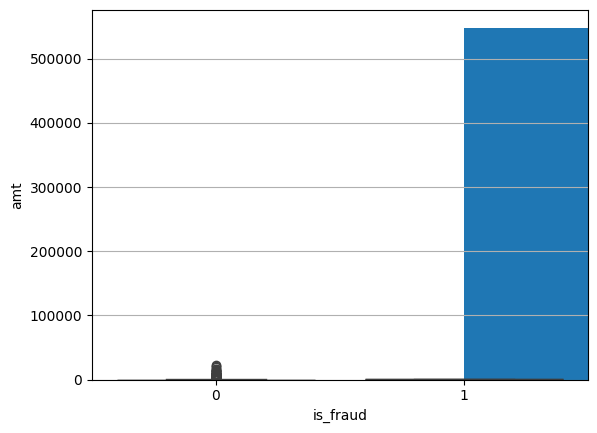

In [ ]:
df["amt"].hist(bins=50)
sns.boxplot(x="is_fraud",y="amt", data=df)

<small> This graph shows the amount of money in transaction whether they fraudent or not

Text(0, 0.5, 'Age (years)')

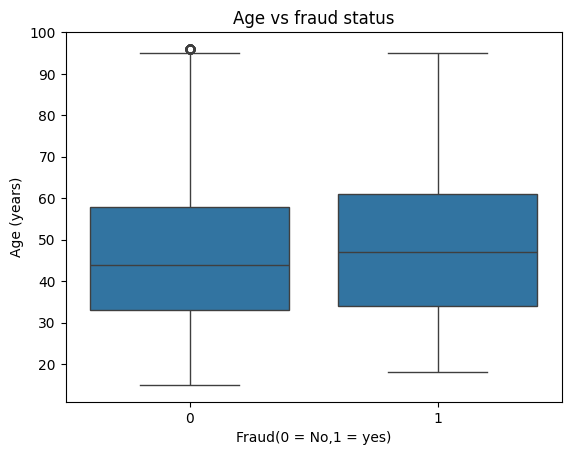

In [ ]:
sns.boxplot(x="is_fraud",y="age", data=df)
plt.title('Age vs fraud status')
plt.xlabel('Fraud(0 = No,1 = yes)')
plt.ylabel('Age (years)')

<small> This graph suggest that age is not a strong indicator to detect the fraud, people who commit fraud and people who do not commit fraud are generally from same age group

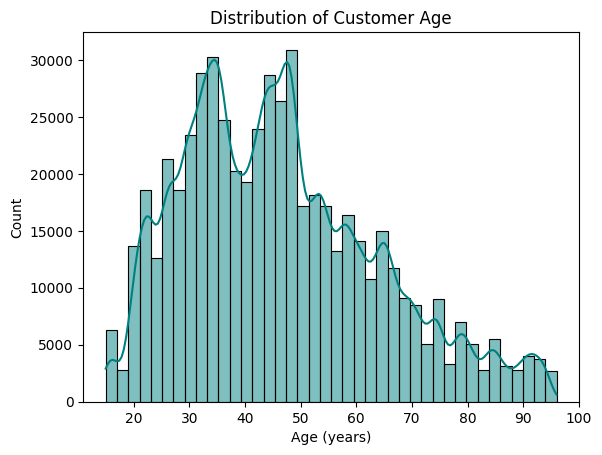

In [ ]:
sns.histplot(df['age'], bins=40, kde=True, color='teal')
plt.title('Distribution of Customer Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

<small> This graph shows the largest number of customer are in the age range 30s to 40s and again around 45s to 55s years

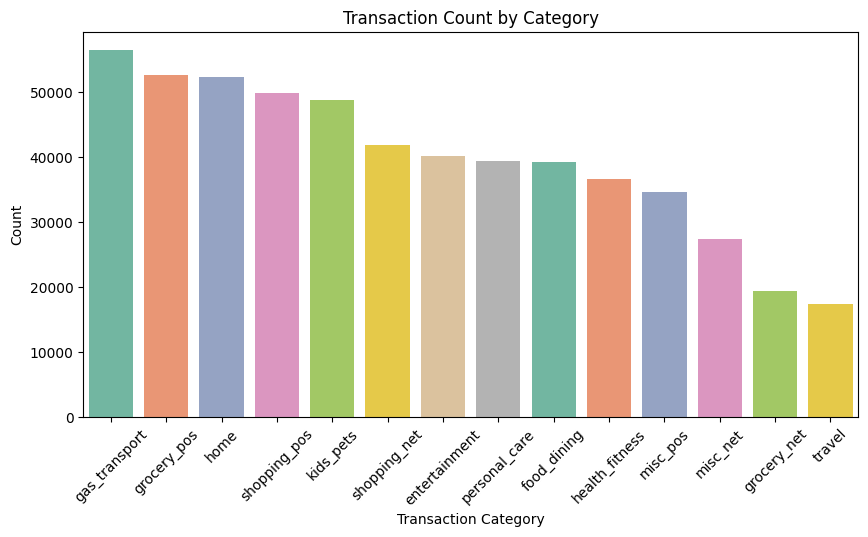

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index, palette='Set2')
plt.title('Transaction Count by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<small> This graph shows the distribution of transactions across different categories,highlighting the proportion of fraudulent and non-fraudulent transactions in each category.

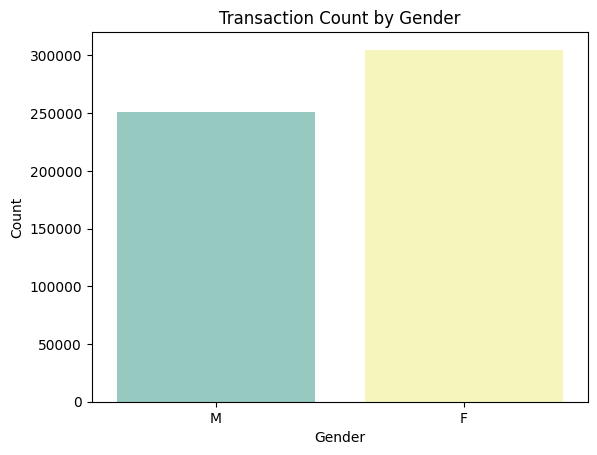

In [ ]:
sns.countplot(x='gender', data=df, palette='Set3')
plt.title('Transaction Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<small> This graph shows the number of transactions made by each gender, helping to understand the gender-wise distribution of transactions.

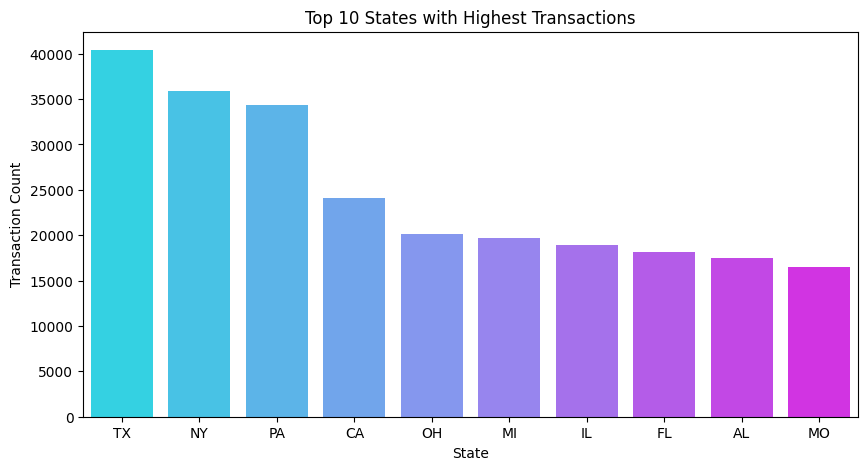

In [ ]:
top_states = df['state'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='cool')
plt.title('Top 10 States with Highest Transactions')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.show()

<small> This graph shows the top 10 states with the highest number of transactions, helping identify regions with major transaction activity

# Bivariate analysis

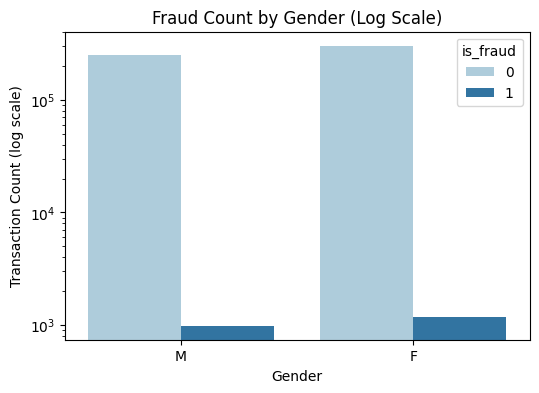

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='is_fraud', data=df, palette='Paired')
plt.yscale('log')   # log scale
plt.title('Fraud Count by Gender (Log Scale)')
plt.xlabel('Gender')
plt.ylabel('Transaction Count (log scale)')
plt.show()


<small> This graph helps to see if frauds are more frequent in transactions made by a particular gender

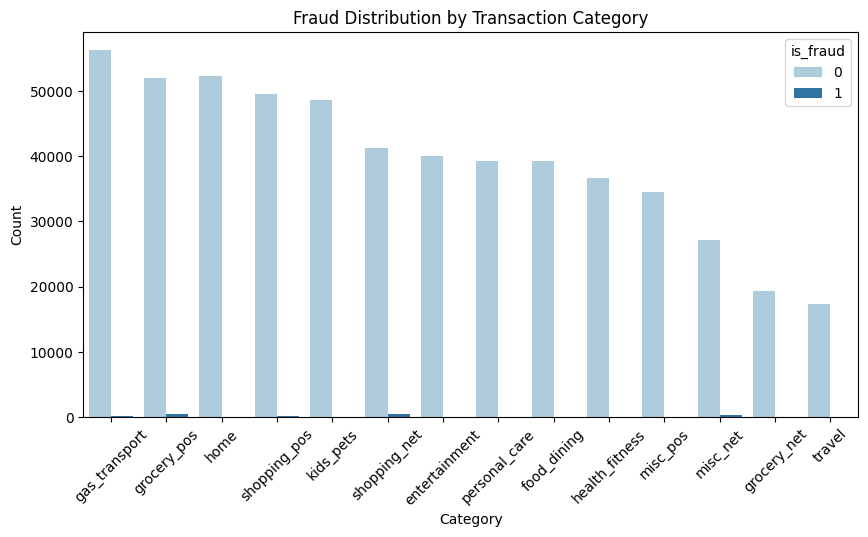

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', hue='is_fraud', data=df, order=df['category'].value_counts().index, palette='Paired')
plt.title('Fraud Distribution by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<small> This graph shows which transaction types have higher fraud risk

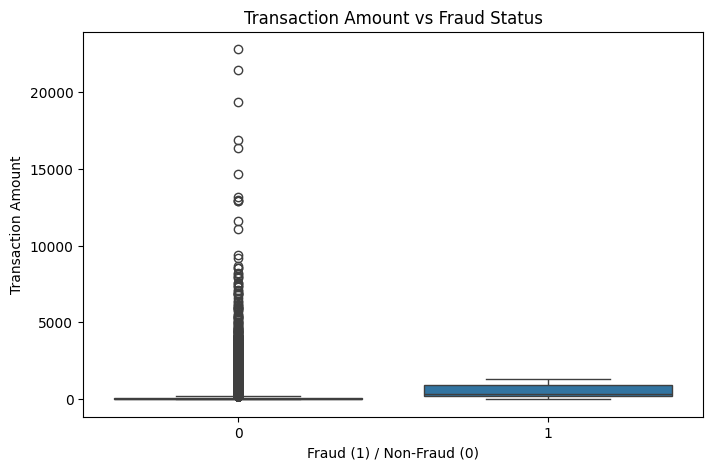

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amt', data=df, palette='Paired')
plt.title('Transaction Amount vs Fraud Status')
plt.xlabel('Fraud (1) / Non-Fraud (0)')
plt.ylabel('Transaction Amount')
plt.show()


<small> Helps to see if fraud transactions usually have higher or lower amounts

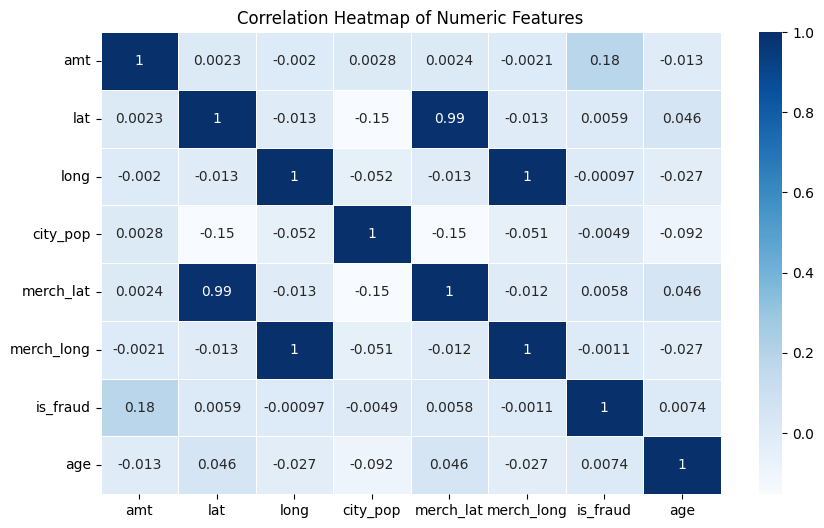

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues',linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


<small> This heatmap shows the correlation between numeric features in the dataset.High positive correlation (closer to 1) indicates that
two features increase together,while high negative correlation (closer to -1) indicates that one feature decreases when the other increases.

# Model preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   merchant     555719 non-null  object 
 1   category     555719 non-null  object 
 2   amt          555719 non-null  float64
 3   gender       555719 non-null  object 
 4   city         555719 non-null  object 
 5   state        555719 non-null  object 
 6   lat          555719 non-null  float64
 7   long         555719 non-null  float64
 8   city_pop     555719 non-null  int64  
 9   job          555719 non-null  object 
 10  merch_lat    555719 non-null  float64
 11  merch_long   555719 non-null  float64
 12  is_fraud     555719 non-null  int64  
 13  trans_hour   555719 non-null  int32  
 14  trans_day    555719 non-null  int32  
 15  trans_month  555719 non-null  int32  
 16  day_of_week  555719 non-null  int32  
 17  age          555719 non-null  int64  
dtypes: float64(5), int32(4),

In [ ]:
categorical_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']

In [ ]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")

merchant: ['fraud_Kirlin and Sons' 'fraud_Sporer-Keebler'
 'fraud_Swaniawski, Nitzsche and Welch' 'fraud_Haley Group'
 'fraud_Johnston-Casper' 'fraud_Daugherty LLC' 'fraud_Romaguera Ltd'
 'fraud_Reichel LLC' 'fraud_Goyette, Howell and Collier'
 'fraud_Kilback Group']
category: ['personal_care' 'health_fitness' 'misc_pos' 'travel' 'kids_pets'
 'shopping_pos' 'food_dining' 'home' 'entertainment' 'shopping_net']
gender: ['M' 'F']
city: ['Columbia' 'Altonah' 'Bellmore' 'Titusville' 'Falmouth' 'Breesport'
 'Carlotta' 'Spencer' 'Morrisdale' 'Prairie Hill']
state: ['SC' 'UT' 'NY' 'FL' 'MI' 'CA' 'SD' 'PA' 'TX' 'KY']
job: ['Mechanical engineer' 'Sales professional, IT' 'Librarian, public'
 'Set designer' 'Furniture designer' 'Psychotherapist'
 'Therapist, occupational' 'Development worker, international aid'
 'Advice worker' 'Barrister']


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Make a copy to avoid changing the original data accidentally
df_model = df.copy()
# Columns to encode
cat_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

<small> This code makes a copy of the dataset to protect the original, then uses Label Encoding to convert text columns

In [ ]:
df_model.dtypes

,0
merchant,int64
category,int64
amt,float64
gender,int64
city,int64
state,int64
lat,float64
long,float64
city_pop,int64
job,int64


In [ ]:
df_model.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,day_of_week,age
0,319,10,2.86,1,157,39,33.9659,-80.9355,333497,275,33.986391,-81.200714,0,12,21,6,6,52
1,591,10,29.84,0,16,43,40.3207,-110.4360,302,392,39.450498,-109.960431,0,12,21,6,6,30
2,611,5,41.28,0,61,33,40.6729,-73.5365,34496,259,40.495810,-74.196111,0,12,21,6,6,49
3,222,9,60.05,1,764,8,28.5697,-80.8191,54767,407,28.812398,-80.883061,0,12,21,6,6,32
4,292,13,3.19,1,247,21,44.2529,-85.0170,1126,196,44.959148,-85.884734,0,12,21,6,6,65


In [ ]:
df_model["is_fraud"].value_counts()

,count
is_fraud,
0,553574
1,2145


In [ ]:
X = df_model.drop('is_fraud', axis=1)
y = df_model['is_fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

<small>
This code splits the data into training (80%) and testing (20%) sets.

# Feature scaling

In [ ]:

from sklearn.preprocessing import RobustScaler

num_cols = ['amt','age','city_pop','lat','long','merch_lat','merch_long']  # adjust
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


<small>This code scales numeric columns using RobustScaler, which reduces the effect of outliers by using the median and interquartile range instead of mean and standard deviation.  
It makes model training more stable and accurate.


# Model Traning

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9959
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
 [[110686     29]
 [   429      0]]


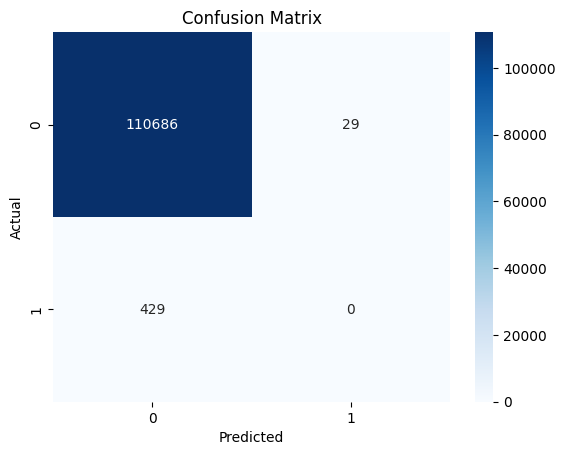

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<small>The model’s accuracy (99.59%) seems high, but precision, recall, and F1-score are 0, which means it fails to detect fraudulent transactions (class 1).  
Almost all predictions are for non-fraud cases — a common issue with imbalanced



### Handling Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('Original dataset shape %s' % len(y_train))
print('Resampled dataset shape %s' % len(y_train_res))
print('Resampled dataset counts by class:\n%s' % y_train_res.value_counts())

Original dataset shape 444575
Resampled dataset shape 885718
Resampled dataset counts by class:
is_fraud
0    442859
1    442859
Name: count, dtype: int64


<small> After applying **SMOTE (Synthetic Minority Oversampling Technique)**, the dataset became balanced.This helps the model learn to identify fraud cases better instead of being biased toward non-fraud ones.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model_resampled = LogisticRegression(random_state=42)

# Train the model on the resampled training data
log_reg_model_resampled.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

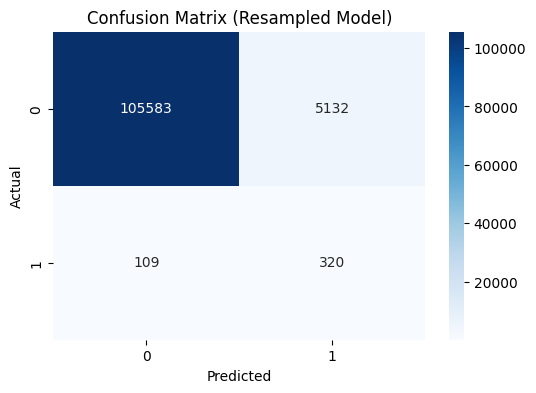

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set using the resampled model
y_pred_resampled = log_reg_model_resampled.predict(X_test)

# Generate the confusion matrix
cm_resampled = confusion_matrix(y_test, y_pred_resampled)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Resampled Model)')
plt.show()


<small>After using SMOTE, the model became better at detecting fraud — recall improved (0.74), meaning it now catches more fraud cases.  
Accuracy dropped slightly, but the model is now smarter at identifying frauds.  



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for the resampled model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)

print("Performance Comparison:")
print("--------------------------------------------------")
print("Metric       | Original Model | Resampled Model")
print("--------------------------------------------------")
print(f"Accuracy     | {accuracy:.4f}         | {accuracy_resampled:.4f}")
print(f"Precision    | {precision:.4f}         | {precision_resampled:.4f}")
print(f"Recall       | {recall:.4f}         | {recall_resampled:.4f}")
print(f"F1-Score     | {f1:.4f}         | {f1_resampled:.4f}")
print("--------------------------------------------------")

Performance Comparison:
--------------------------------------------------
Metric       | Original Model | Resampled Model
--------------------------------------------------
Accuracy     | 0.9959         | 0.9528
Precision    | 0.0000         | 0.0587
Recall       | 0.0000         | 0.7459
F1-Score     | 0.0000         | 0.1088
--------------------------------------------------


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Random Forest with basic parameters
#Explanation:
#n_estimators=200 → sufficient trees for stable performance
#class_weight='balanced' → fraud class weight automatically adjust
#Random Forest handles non-linear patterns & outliers naturally
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,           # let trees grow fully
    random_state=42,
    class_weight='balanced'   # handle class imbalance
)

# Train on SMOTE balanced training data
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.57      0.77      0.65       429

    accuracy                           1.00    111144
   macro avg       0.78      0.88      0.83    111144
weighted avg       1.00      1.00      1.00    111144



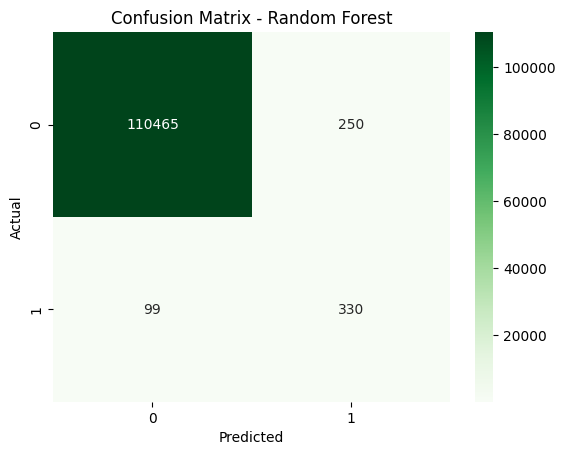

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


<small>Random Forest model gives strong results — it detects most frauds (high recall 0.77) and keeps accuracy very high (1.00).  



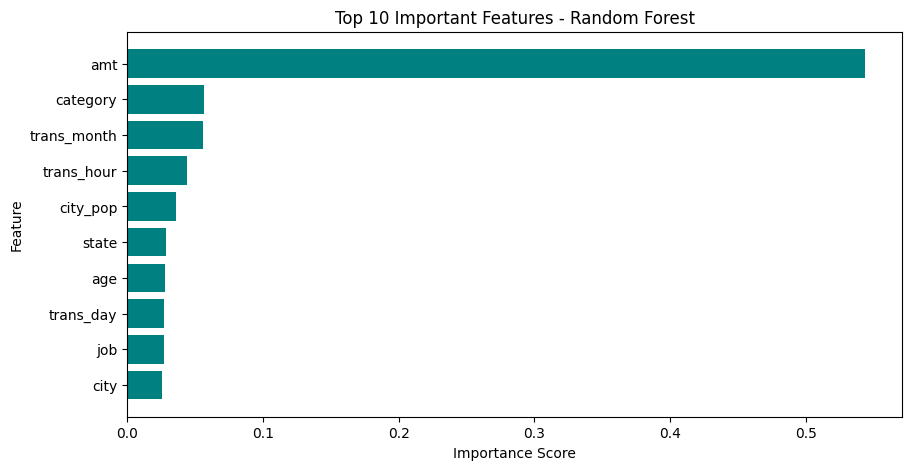

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# DataFrame banana
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,5))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

<small> This feature importance chart from the **Random Forest model** shows which variables most affect fraud prediction. Here, **`amt` (transaction amount)** has the highest importance — meaning it plays the biggest role in detecting fraud. Other features contribute much less, showing that high transaction amounts are the strongest indicator of possible fraud in this dataset.

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled training data
gb_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    110715
           1       0.08      0.83      0.15       429

    accuracy                           0.96    111144
   macro avg       0.54      0.90      0.56    111144
weighted avg       1.00      0.96      0.98    111144



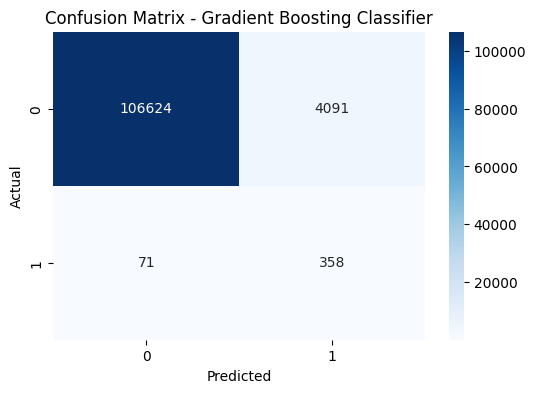

In [ ]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


<small> This Gradient Boosting model detects frauds quite well (high recall = 0.83) but has low precision (0.08), meaning it predicts many non-frauds as frauds.  
Overall accuracy is 96%, showing strong general performance but room to improve precision.  


In [ ]:
print("Performance Comparison: Gradient Boosting vs Random Forest")
print("----------------------------------------------------------")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("----------------------------------------------------------")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("----------------------------------------------------------")

Performance Comparison: Gradient Boosting vs Random Forest
----------------------------------------------------------
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    110715
           1       0.08      0.83      0.15       429

    accuracy                           0.96    111144
   macro avg       0.54      0.90      0.56    111144
weighted avg       1.00      0.96      0.98    111144

----------------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.57      0.77      0.65       429

    accuracy                           1.00    111144
   macro avg       0.78      0.88      0.83    111144
weighted avg       1.00      1.00      1.00    111144

----------------------------------------------------------
